In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv('loans.csv')
data

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
0                0.0          0.0      0.0               0  
1                0.0          0.0      0.0               0  
2                1.0          0.0      0.0               0  
3                1.0          0.0      0.0               0  
4                0.0          1.0      0.0               0  
...              ...          ...      ...             ...  
9573             2.0          0.0      0.0               1  
9574             5.0          0.0      0.0               1  
9575             8.0          0.0      0.0               1  
9576             5.0          0.0      0.0               1  
9577             6.0          0.0      0.0               1  

[9578 rows x 14 columns]

In [3]:
data.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1             0.0   
1  14.29   707        2760.000000      33623        76.7             0.0   
2  11.63   682        4710.000000       3511        25.6             1.0   
3   8.10   712        2699.958333      33667        73.2             1.0   
4  14.97   667        4066.000000       4740        39.5             0.0   

   delinq.2yrs  pub.rec  not.fully.paid  
0          0.0      0.0               0  
1          0.0      0.0               0  
2          0.0      0.0               0  
3          0.0      0.0               0  
4          1.0      0.0               0

In [3]:
# placing the names of columns

#  days.with.cr.line = The number of days the borrower has had a credit line.
#  revol.bal = The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle). revol. util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
#  revol.util = The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). inq. last. 6mths: The borrower's number of inquiries by creditors in the last 6 months
#  delinq.2yrs = The number of times the borrower had been 30+ days past due on a payment in the past 2 years. pub. rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments)
#  pub.rec = Thus, public debt refers to loans incurred by the government to finance its activities when other sources of public income fail to meet the requirements. In this wider sense, the proceeds of such public borrowing constitute public income
#  not.fully.paid = 

data=data.rename(columns={'credit.policy' : 'credit_policy'})
data=data.rename(columns={'int.rate': 'interest_rate' ,
                          'days.with.cr.line' : 'days_with_cr_line' ,
                          'revol.bal' : 'revol_bal' ,
                          'revol.util' : 'revol_util' ,
                          'inq.last.6mths' : 'inq_last_6mths' ,
                          'delinq.2yrs' : 'delinq_2yrs' ,
                          'pub.rec' : 'pub_rec' ,
                          'log.annual.inc' : 'log_annual_income',
                          'not.fully.paid' : 'not_fully_paid'})
data.head()

credit_policy             purpose  interest_rate  installment  \
0              1  debt_consolidation         0.1189       829.10   
1              1         credit_card         0.1071       228.22   
2              1  debt_consolidation         0.1357       366.86   
3              1  debt_consolidation         0.1008       162.34   
4              1         credit_card         0.1426       102.92   

   log_annual_income    dti  fico  days_with_cr_line  revol_bal  revol_util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   

   inq_last_6mths  delinq_2yrs  pub_rec  not_fully_paid  
0             0.0          0.0      0.0               0  
1             0.0          0.0      0.0               0  
2             1.0          0.0      0.0               0  
3             1.0          0.0      0.0               0  
4             0.0          1.0      0.0               0

In [5]:
data.credit_policy.value_counts()  # shows in count numbers

1    7710
0    1868
Name: credit_policy, dtype: int64

In [6]:
data.credit_policy.value_counts(normalize=True)  # it shows in % number

1    0.80497
0    0.19503
Name: credit_policy, dtype: float64

In [7]:
data.inq_last_6mths.value_counts()

0.0     3634
1.0     2459
2.0     1381
3.0      860
4.0      469
5.0      273
6.0      161
7.0      100
8.0       71
9.0       47
10.0      23
11.0      15
12.0      15
15.0       9
13.0       6
14.0       6
18.0       4
16.0       3
17.0       2
19.0       2
24.0       2
28.0       1
32.0       1
33.0       1
25.0       1
31.0       1
27.0       1
20.0       1
Name: inq_last_6mths, dtype: int64

In [8]:
data.delinq_2yrs.value_counts()

0.0     8433
1.0      828
2.0      192
3.0       65
4.0       19
5.0        6
6.0        2
11.0       1
13.0       1
8.0        1
7.0        1
Name: delinq_2yrs, dtype: int64

In [9]:
data.pub_rec.value_counts()

0.0    8992
1.0     531
2.0      19
3.0       5
5.0       1
4.0       1
Name: pub_rec, dtype: int64

In [10]:
data.not_fully_paid.value_counts()

0    8045
1    1533
Name: not_fully_paid, dtype: int64

In [11]:
data.describe()

credit_policy  interest_rate  installment  log_annual_income  \
count    9578.000000    9578.000000  9578.000000        9574.000000   
mean        0.804970       0.122640   319.089413          10.931874   
std         0.396245       0.026847   207.071301           0.614736   
min         0.000000       0.060000    15.670000           7.547502   
25%         1.000000       0.103900   163.770000          10.558414   
50%         1.000000       0.122100   268.950000          10.927987   
75%         1.000000       0.140700   432.762500          11.289832   
max         1.000000       0.216400   940.140000          14.528354   

               dti         fico  days_with_cr_line     revol_bal   revol_util  \
count  9578.000000  9578.000000        9549.000000  9.578000e+03  9516.000000   
mean     12.606679   710.846314        4562.026085  1.691396e+04    46.865677   
std       6.883970    37.970537        2497.985733  3.375619e+04    29.018642   
min       0.000000   612.000000         178.958333  0.000000e+00     0.000000   
25%       7.212500   682.000000        2820.000000  3.187000e+03    22.700000   
50%      12.665000   707.000000        4139.958333  8.596000e+03    46.400000   
75%      17.950000   737.000000        5730.000000  1.824950e+04    71.000000   
max      29.960000   827.000000       17639.958330  1.207359e+06   119.000000   

       inq_last_6mths  delinq_2yrs      pub_rec  not_fully_paid  
count     9549.000000  9549.000000  9549.000000     9578.000000  
mean         1.571578     0.163787     0.062101        0.160054  
std          2.198095     0.546712     0.262152        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [12]:
data.describe(include=['integer'])

credit_policy         fico     revol_bal  not_fully_paid
count    9578.000000  9578.000000  9.578000e+03     9578.000000
mean        0.804970   710.846314  1.691396e+04        0.160054
std         0.396245    37.970537  3.375619e+04        0.366676
min         0.000000   612.000000  0.000000e+00        0.000000
25%         1.000000   682.000000  3.187000e+03        0.000000
50%         1.000000   707.000000  8.596000e+03        0.000000
75%         1.000000   737.000000  1.824950e+04        0.000000
max         1.000000   827.000000  1.207359e+06        1.000000

In [13]:
data.describe(include=['float'])

interest_rate  installment  log_annual_income          dti  \
count    9578.000000  9578.000000        9574.000000  9578.000000   
mean        0.122640   319.089413          10.931874    12.606679   
std         0.026847   207.071301           0.614736     6.883970   
min         0.060000    15.670000           7.547502     0.000000   
25%         0.103900   163.770000          10.558414     7.212500   
50%         0.122100   268.950000          10.927987    12.665000   
75%         0.140700   432.762500          11.289832    17.950000   
max         0.216400   940.140000          14.528354    29.960000   

       days_with_cr_line   revol_util  inq_last_6mths  delinq_2yrs  \
count        9549.000000  9516.000000     9549.000000  9549.000000   
mean         4562.026085    46.865677        1.571578     0.163787   
std          2497.985733    29.018642        2.198095     0.546712   
min           178.958333     0.000000        0.000000     0.000000   
25%          2820.000000    22.700000        0.000000     0.000000   
50%          4139.958333    46.400000        1.000000     0.000000   
75%          5730.000000    71.000000        2.000000     0.000000   
max         17639.958330   119.000000       33.000000    13.000000   

           pub_rec  
count  9549.000000  
mean      0.062101  
std       0.262152  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       5.000000

In [14]:
data.describe(include=['object'])

purpose
count                 9578
unique                   7
top     debt_consolidation
freq                  3957

# taget variable is 'not_fully_paid'

In [4]:
data.isnull().sum()

credit_policy         0
purpose               0
interest_rate         0
installment           0
log_annual_income     4
dti                   0
fico                  0
days_with_cr_line    29
revol_bal             0
revol_util           62
inq_last_6mths       29
delinq_2yrs          29
pub_rec              29
not_fully_paid        0
dtype: int64

In [18]:
# changing all null values

In [5]:
data = data.fillna({'log_annual_income':data.log_annual_income.mean(),
                    'days_with_cr_line' : data.days_with_cr_line.mean(),
                    'revol_util' : data.revol_util.mean(),
                    'inq_last_6mths' : data.inq_last_6mths.mean(), b bv
                    'delinq_2yrs' : data.delinq_2yrs.mean(),
                    'pub_rec' : data.pub_rec.mean()})
data.isnull().sum()

credit_policy        0
purpose              0
interest_rate        0
installment          0
log_annual_income    0
dti                  0
fico                 0
days_with_cr_line    0
revol_bal            0
revol_util           0
inq_last_6mths       0
delinq_2yrs          0
pub_rec              0
not_fully_paid       0
dtype: int64

In [17]:
data.describe()


credit_policy  interest_rate  installment  log_annual_income  \
count    9578.000000    9578.000000  9578.000000        9578.000000   
mean        0.804970       0.122640   319.089413          10.931874   
std         0.396245       0.026847   207.071301           0.614608   
min         0.000000       0.060000    15.670000           7.547502   
25%         1.000000       0.103900   163.770000          10.558414   
50%         1.000000       0.122100   268.950000          10.929887   
75%         1.000000       0.140700   432.762500          11.289832   
max         1.000000       0.216400   940.140000          14.528354   

               dti         fico  days_with_cr_line     revol_bal   revol_util  \
count  9578.000000  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean     12.606679   710.846314        4562.026085  1.691396e+04    46.865677   
std       6.883970    37.970537        2494.200805  3.375619e+04    28.924559   
min       0.000000   612.000000         178.958333  0.000000e+00     0.000000   
25%       7.212500   682.000000        2820.000000  3.187000e+03    22.900000   
50%      12.665000   707.000000        4139.979166  8.596000e+03    46.700000   
75%      17.950000   737.000000        5729.958333  1.824950e+04    70.800000   
max      29.960000   827.000000       17639.958330  1.207359e+06   119.000000   

       inq_last_6mths  delinq_2yrs      pub_rec  not_fully_paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.571578     0.163787     0.062101        0.160054  
std          2.194765     0.545883     0.261755        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   interest_rate      9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_income  9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   float64
 11  delinq_2yrs        9578 non-null   float64
 12  pub_rec            9578 non-null   float64
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 1.0+ MB


In [7]:
data.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [20]:
!pip install sweetviz
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [24]:
data.head()

credit_policy             purpose  interest_rate  installment  \
0              1  debt_consolidation         0.1189       829.10   
1              1         credit_card         0.1071       228.22   
2              1  debt_consolidation         0.1357       366.86   
3              1  debt_consolidation         0.1008       162.34   
4              1         credit_card         0.1426       102.92   

   log_annual_income    dti  fico  days_with_cr_line  revol_bal  revol_util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   

   inq_last_6mths  delinq_2yrs  pub_rec  not_fully_paid  
0             0.0          0.0      0.0               0  
1             0.0          0.0      0.0               0  
2             1.0          0.0      0.0               0  
3             1.0          0.0      0.0               0  
4             0.0          1.0      0.0               0

In [25]:
data.isnull().sum()

credit_policy        0
purpose              0
interest_rate        0
installment          0
log_annual_income    0
dti                  0
fico                 0
days_with_cr_line    0
revol_bal            0
revol_util           0
inq_last_6mths       0
delinq_2yrs          0
pub_rec              0
not_fully_paid       0
dtype: int64

In [8]:
data.shape

(9578, 14)

# analysing

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (9578, 14)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  9
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0


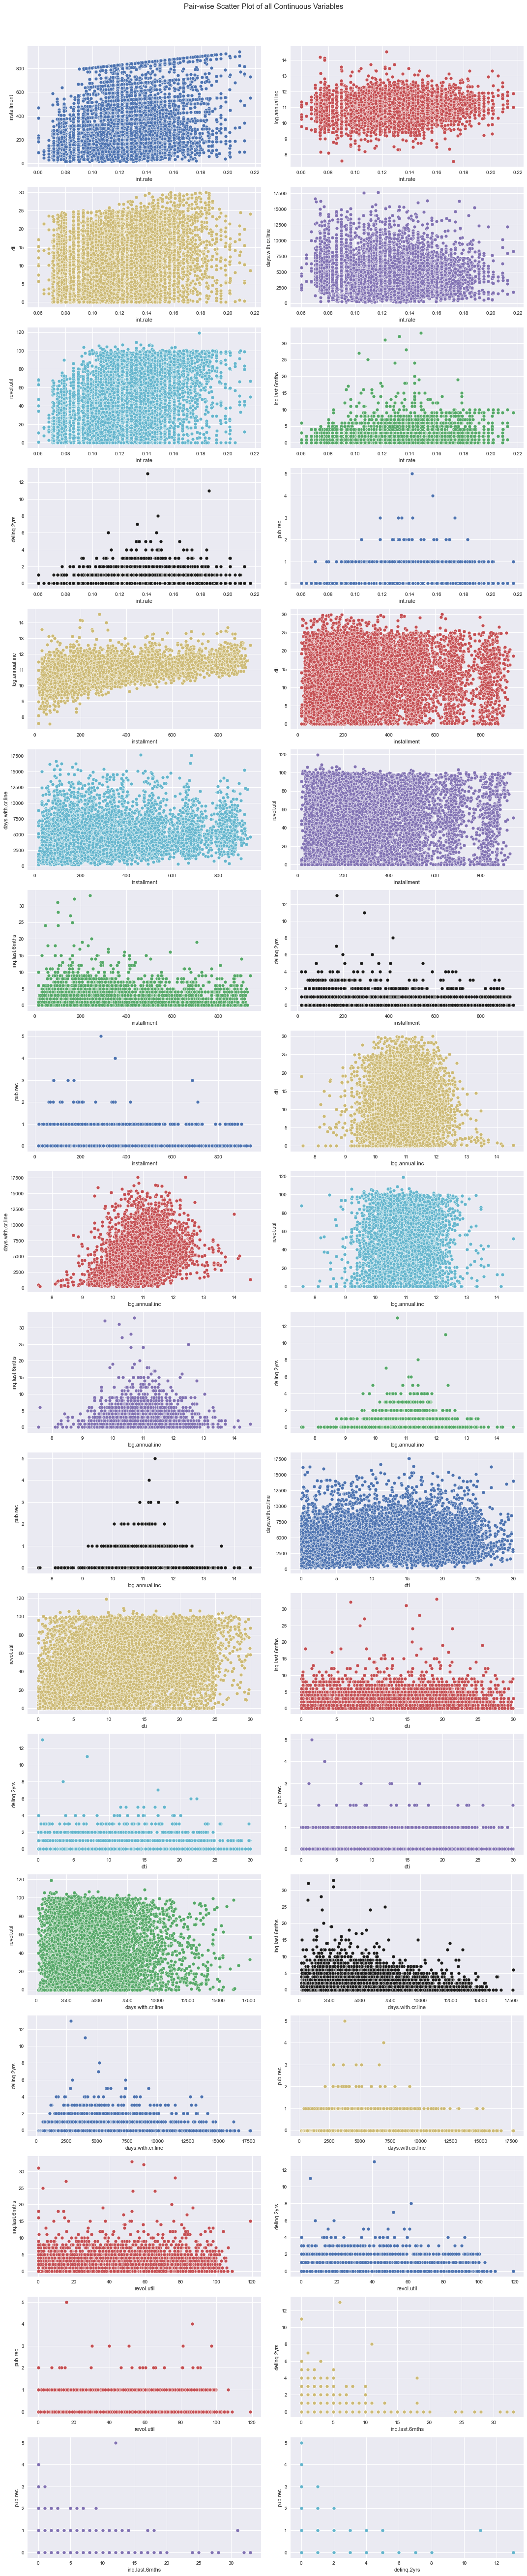

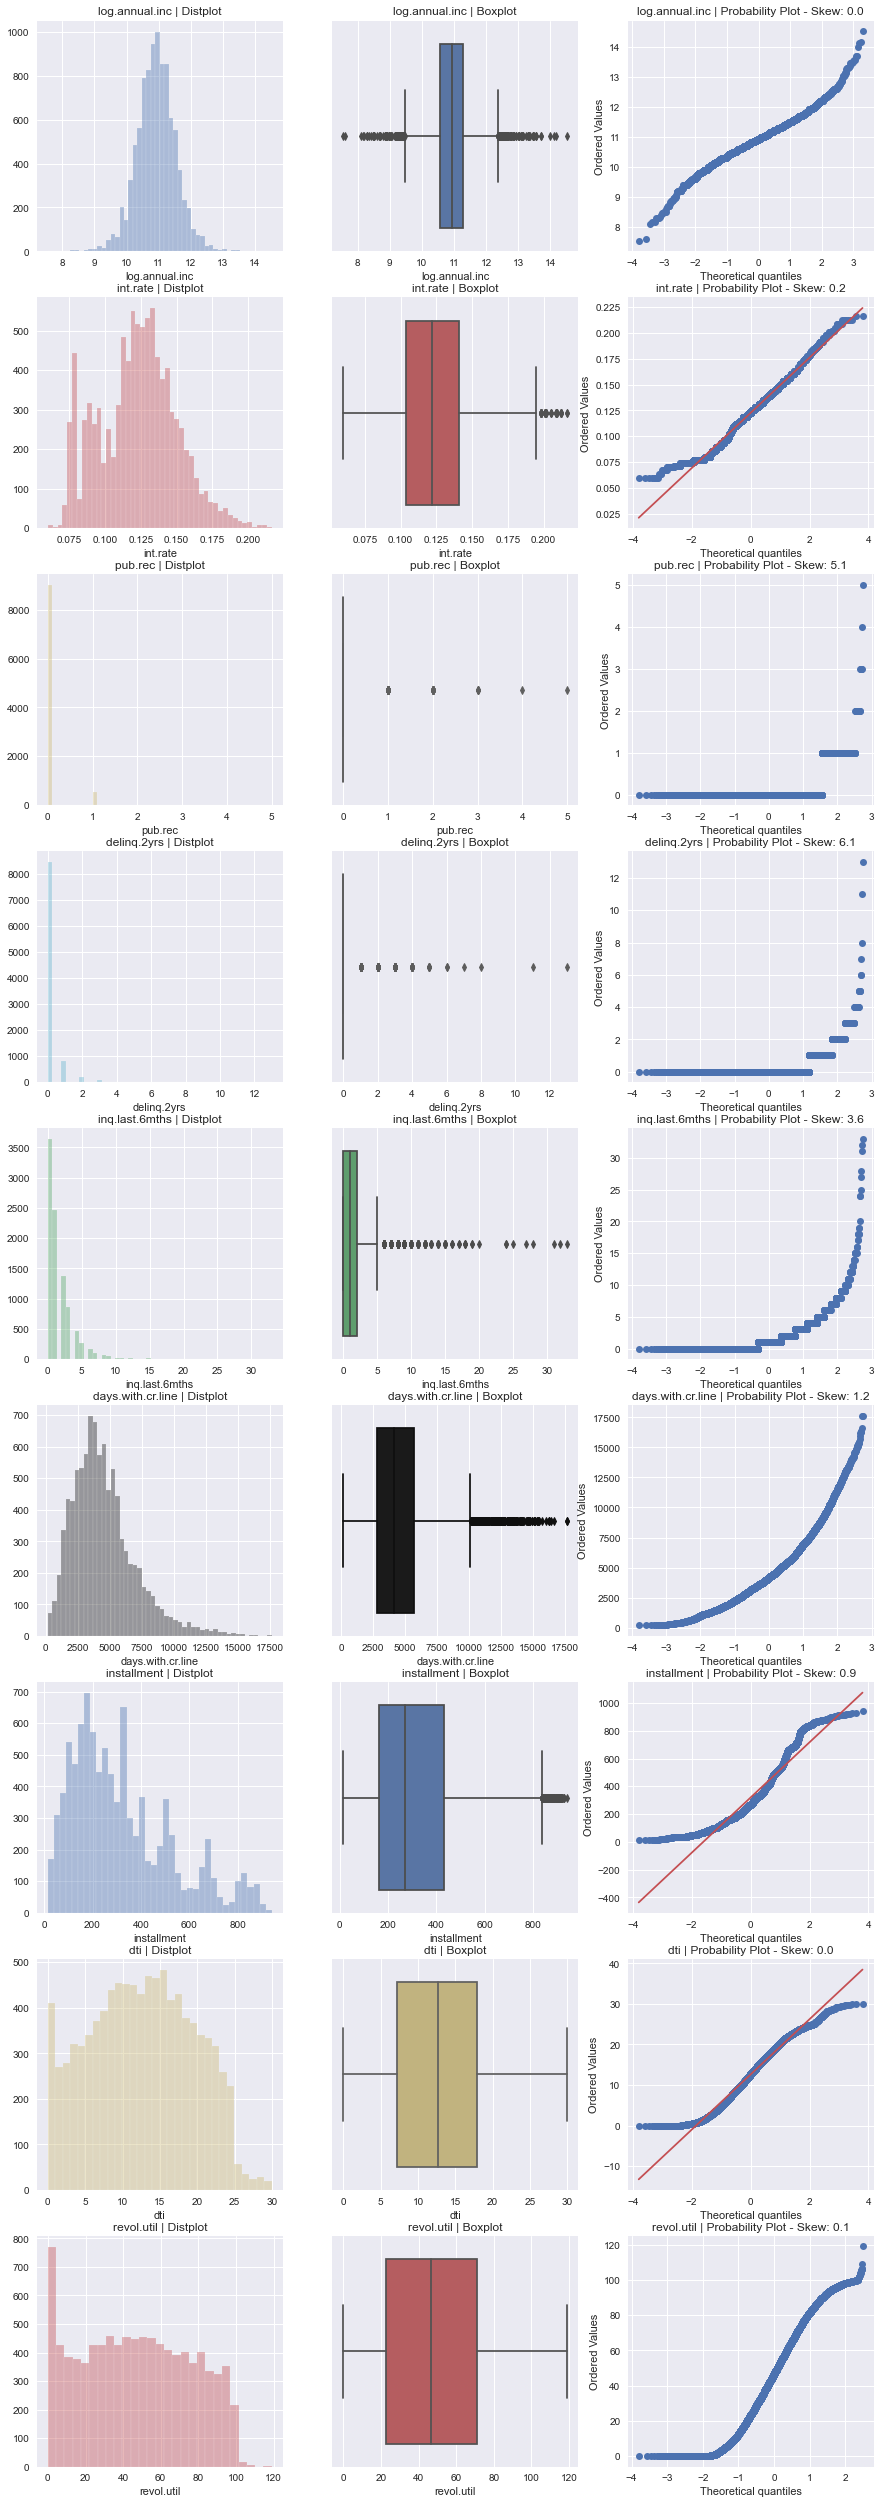

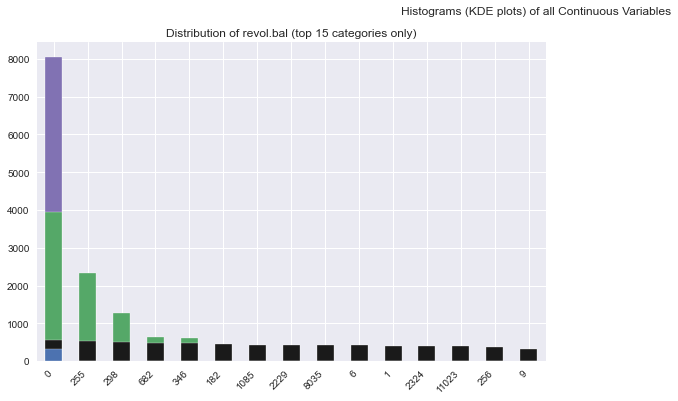

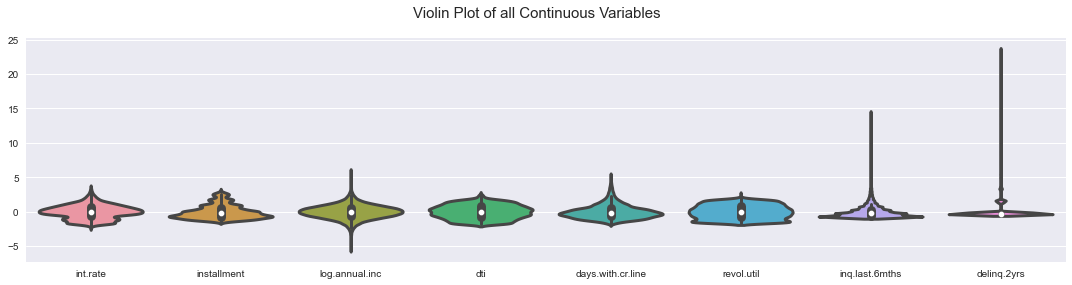

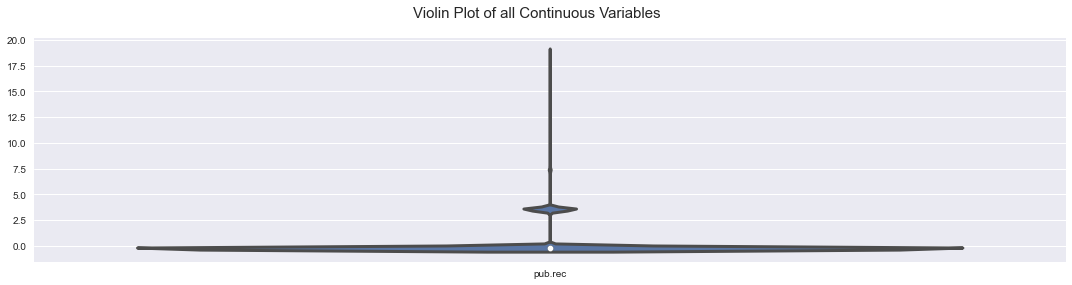

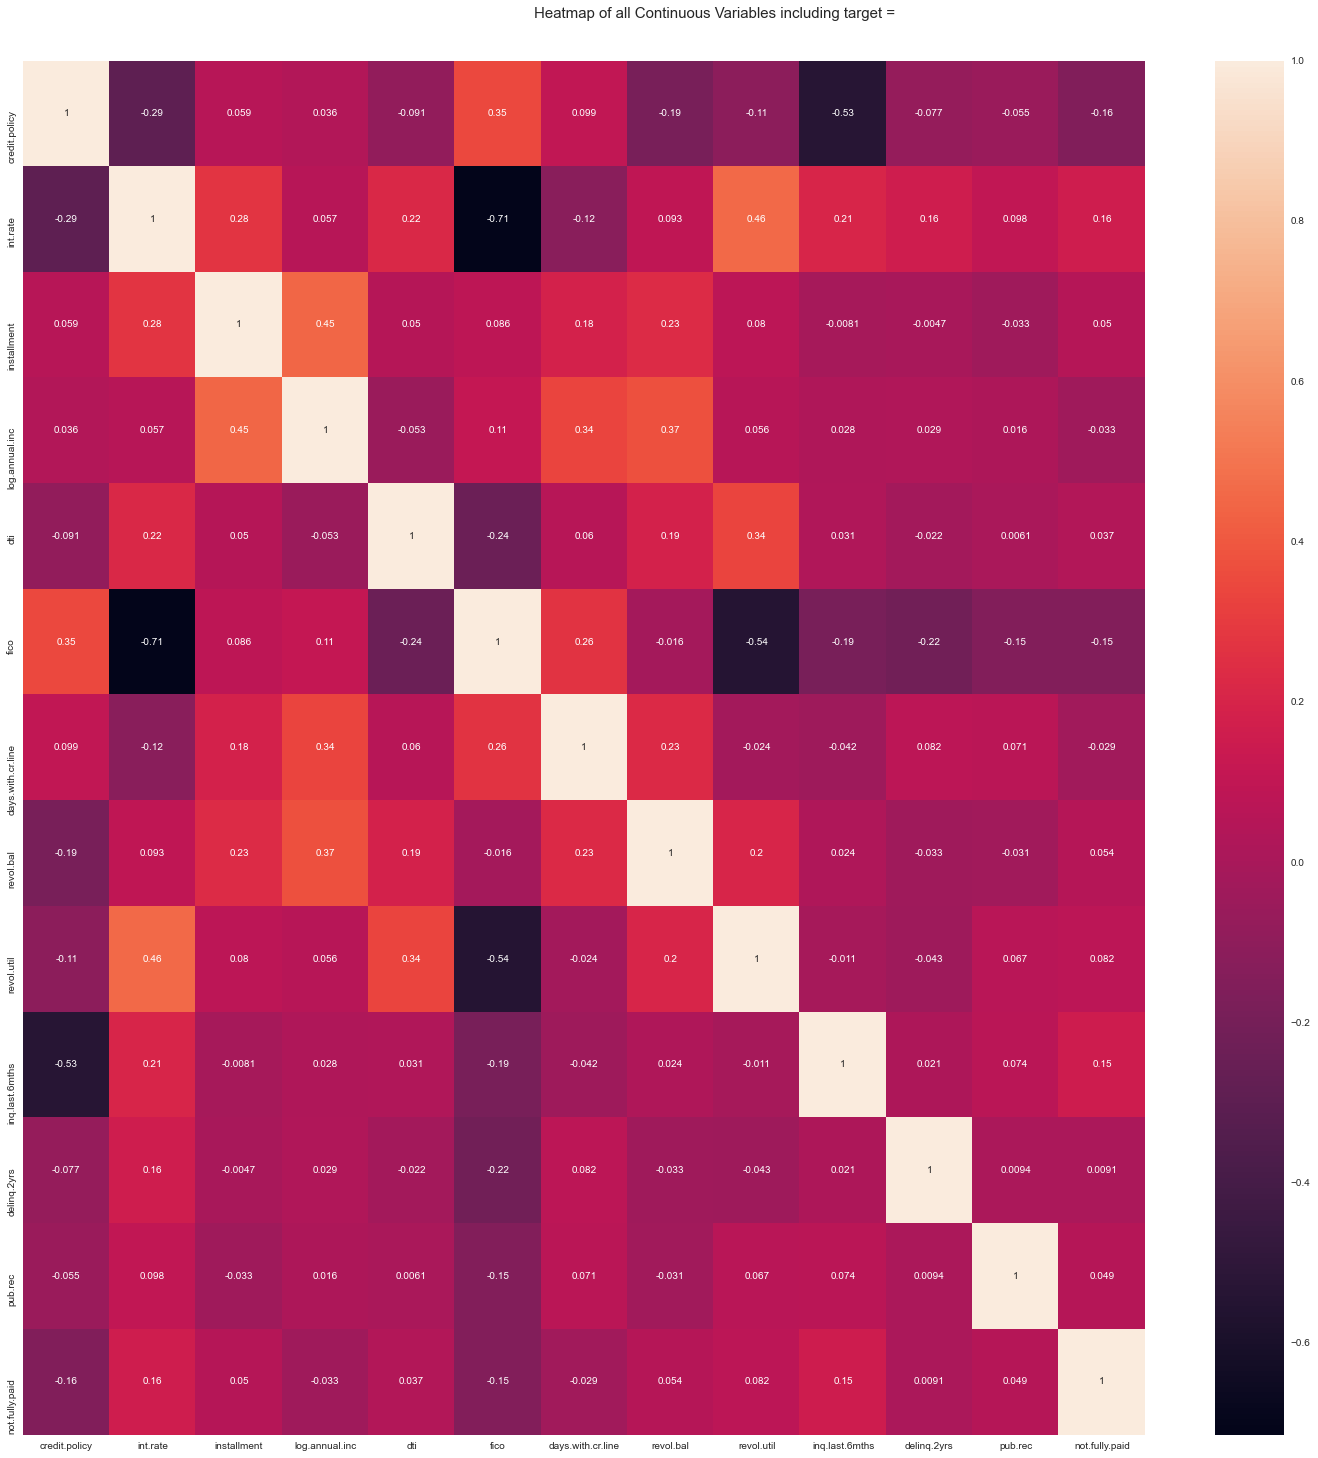

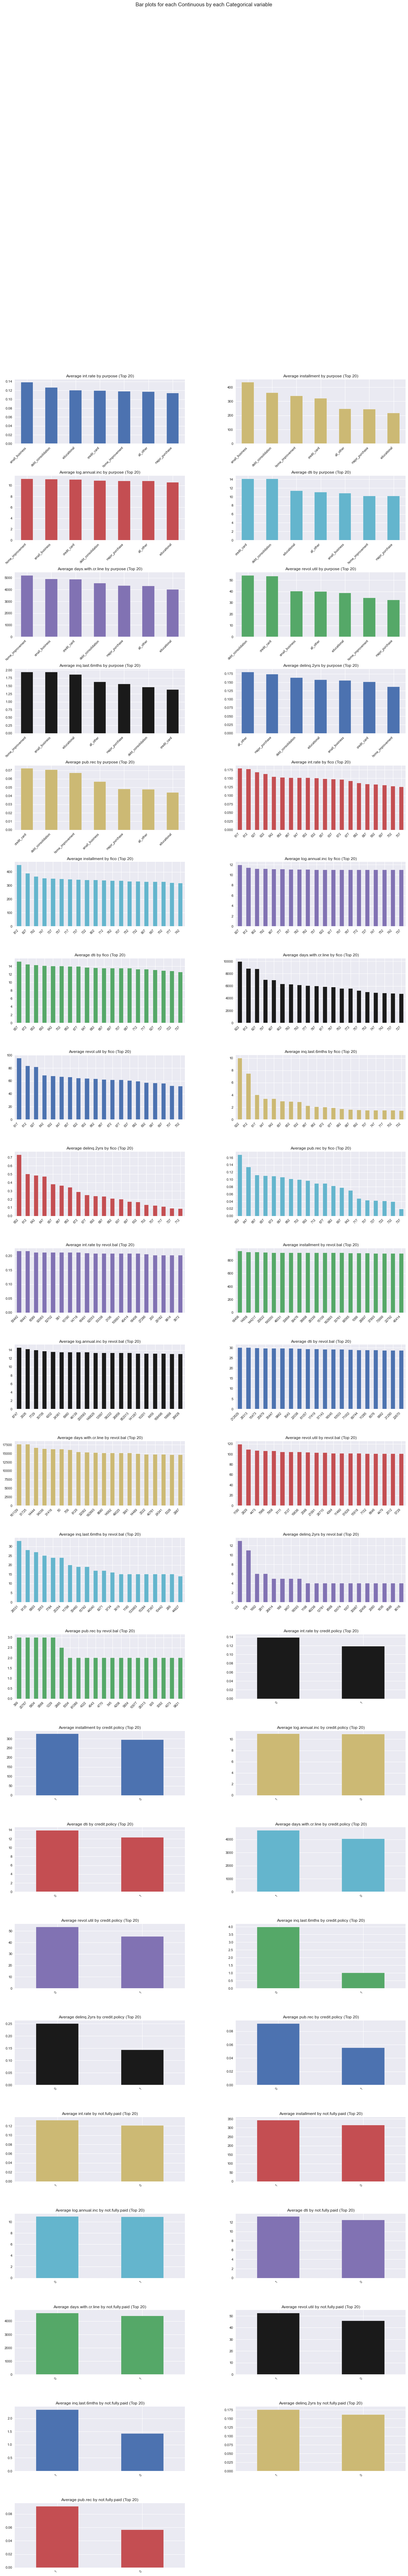

Time to run AutoViz (in seconds) = 39.366

 ###################### VISUALIZATION Completed ########################


In [24]:
!pip install autoviz

from autoviz.AutoViz_Class import AutoViz_Class
AV=AutoViz_Class()

filename = "loans.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

In [9]:
len(data.columns)

14

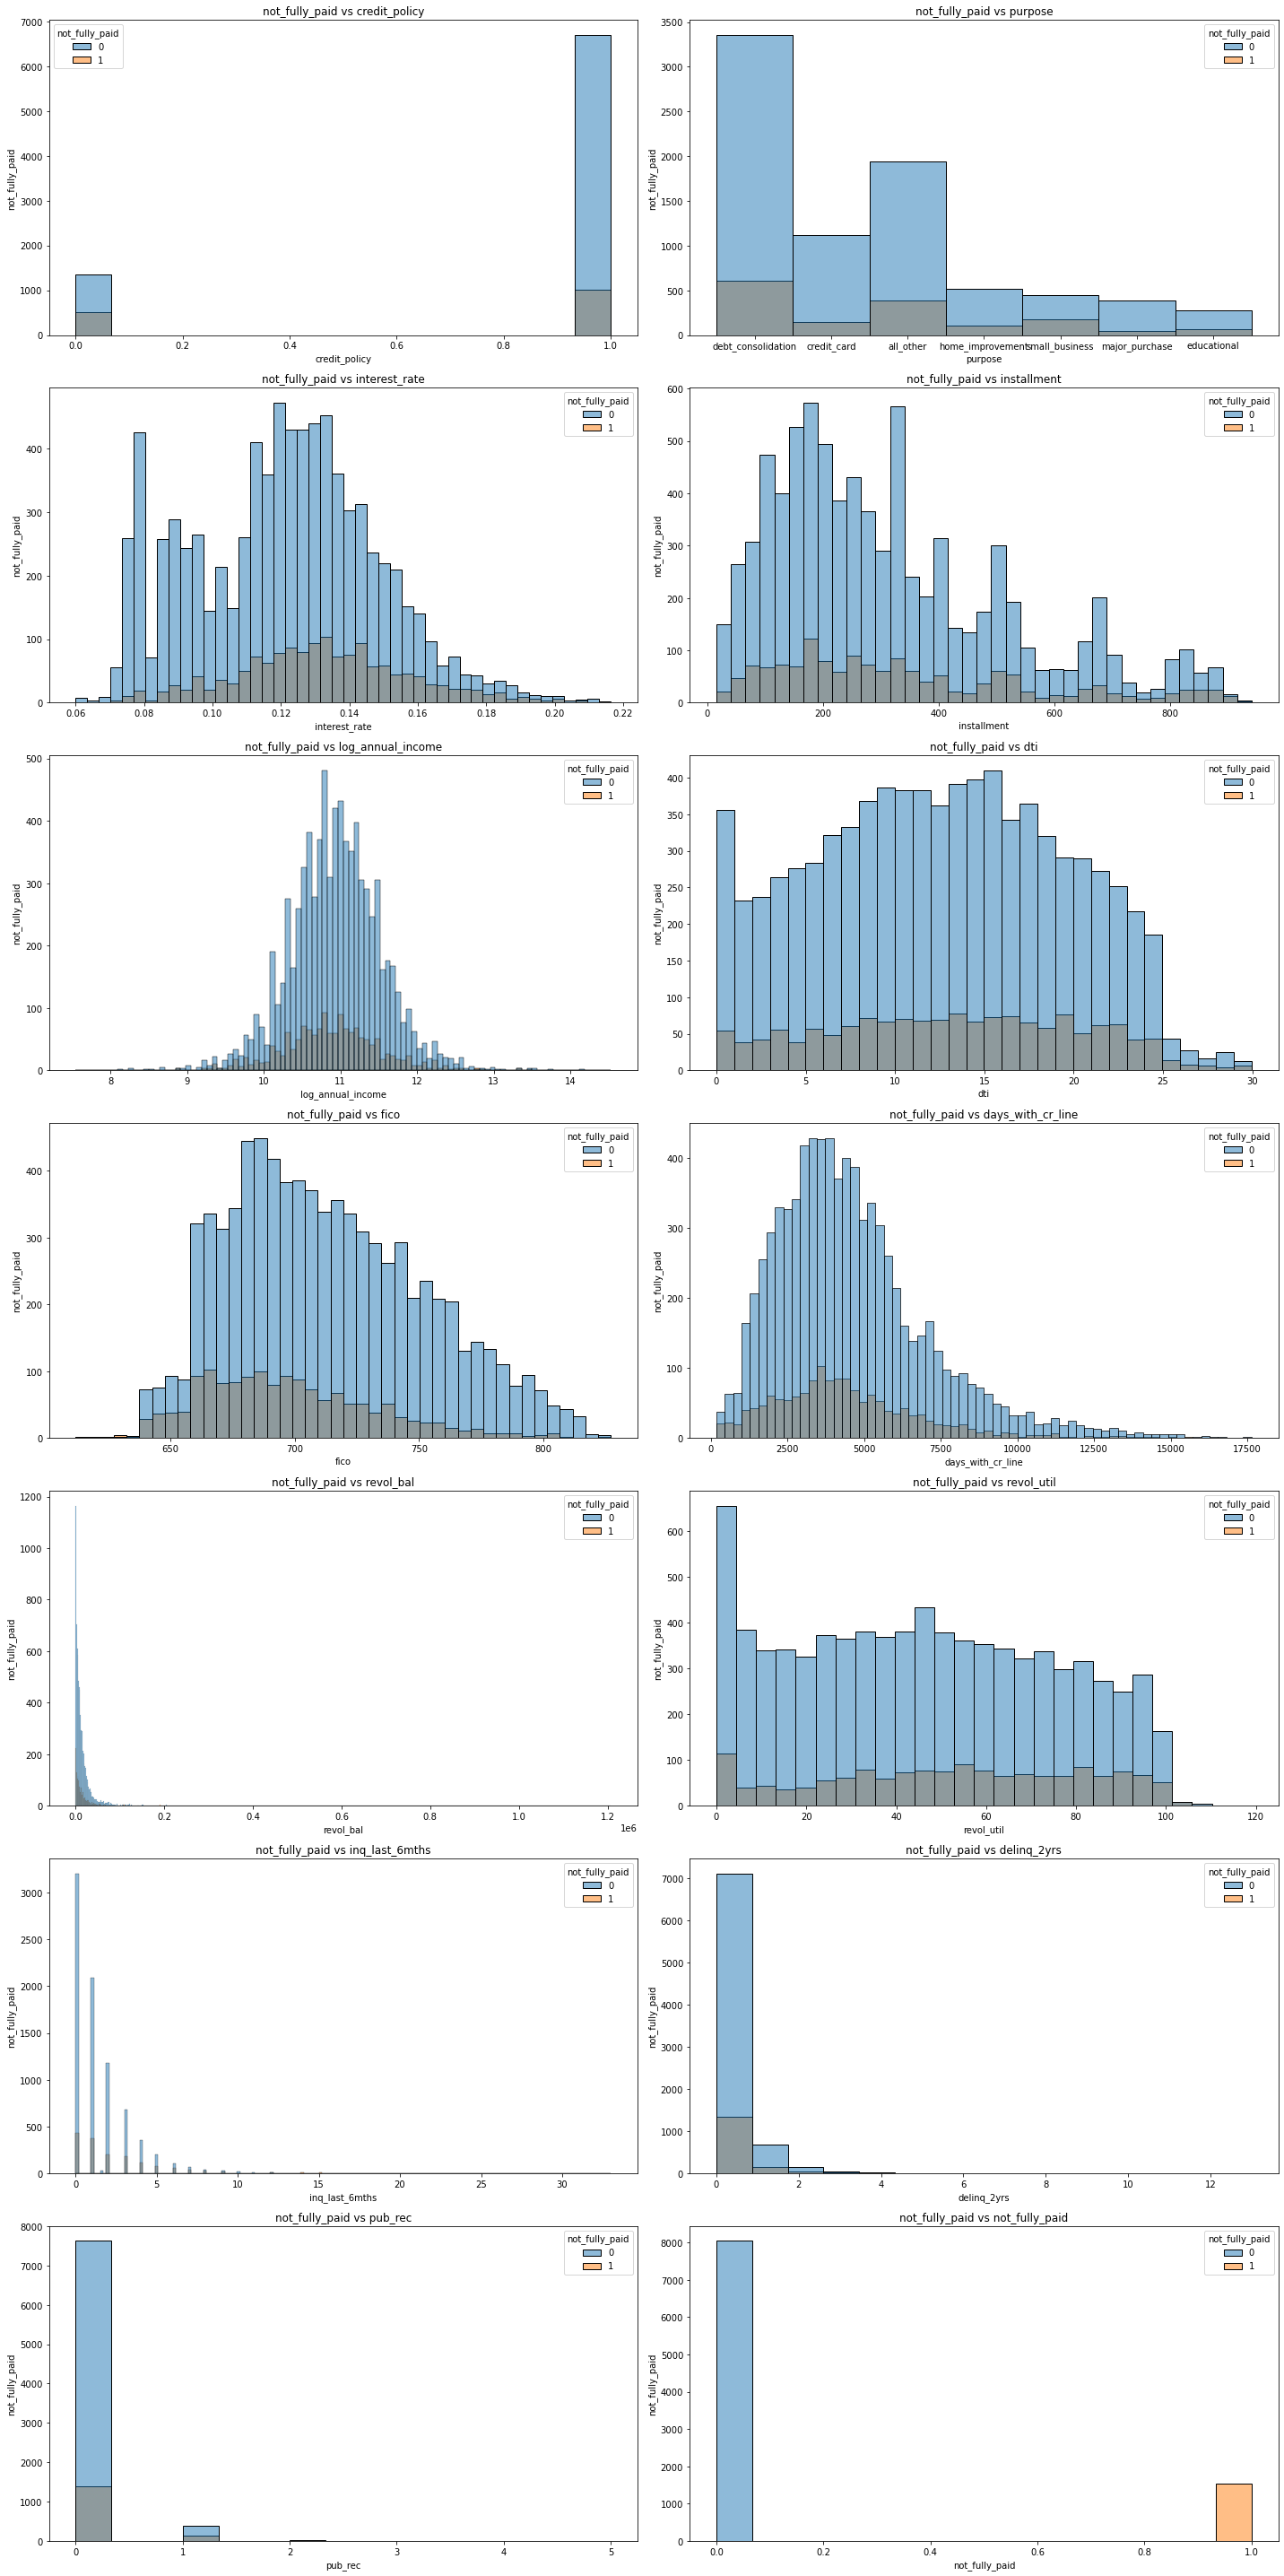

In [22]:
plt.figure(figsize=(20,40), facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=14:
        ax=plt.subplot(7,2,plotnumber)
        sns.histplot(x=data[column], hue=data.not_fully_paid)
        plt.xlabel(column)
        plt.ylabel('not_fully_paid')
        plt.title(f'not_fully_paid vs {column}')
    plotnumber+=1
plt.tight_layout()

In [10]:
# converting 'not_fully_paid' column

data=data.rename(columns={'not_fully_paid' : 'fully_paid'})  # changed name of the column

data.fully_paid =data.fully_paid.replace({0 : 1, 
                                          1 : 0})  
data.fully_paid.value_counts()

1    8045
0    1533
Name: fully_paid, dtype: int64

In [11]:
data.fully_paid.value_counts(normalize=True)

1    0.839946
0    0.160054
Name: fully_paid, dtype: float64

# this is not balanced data 

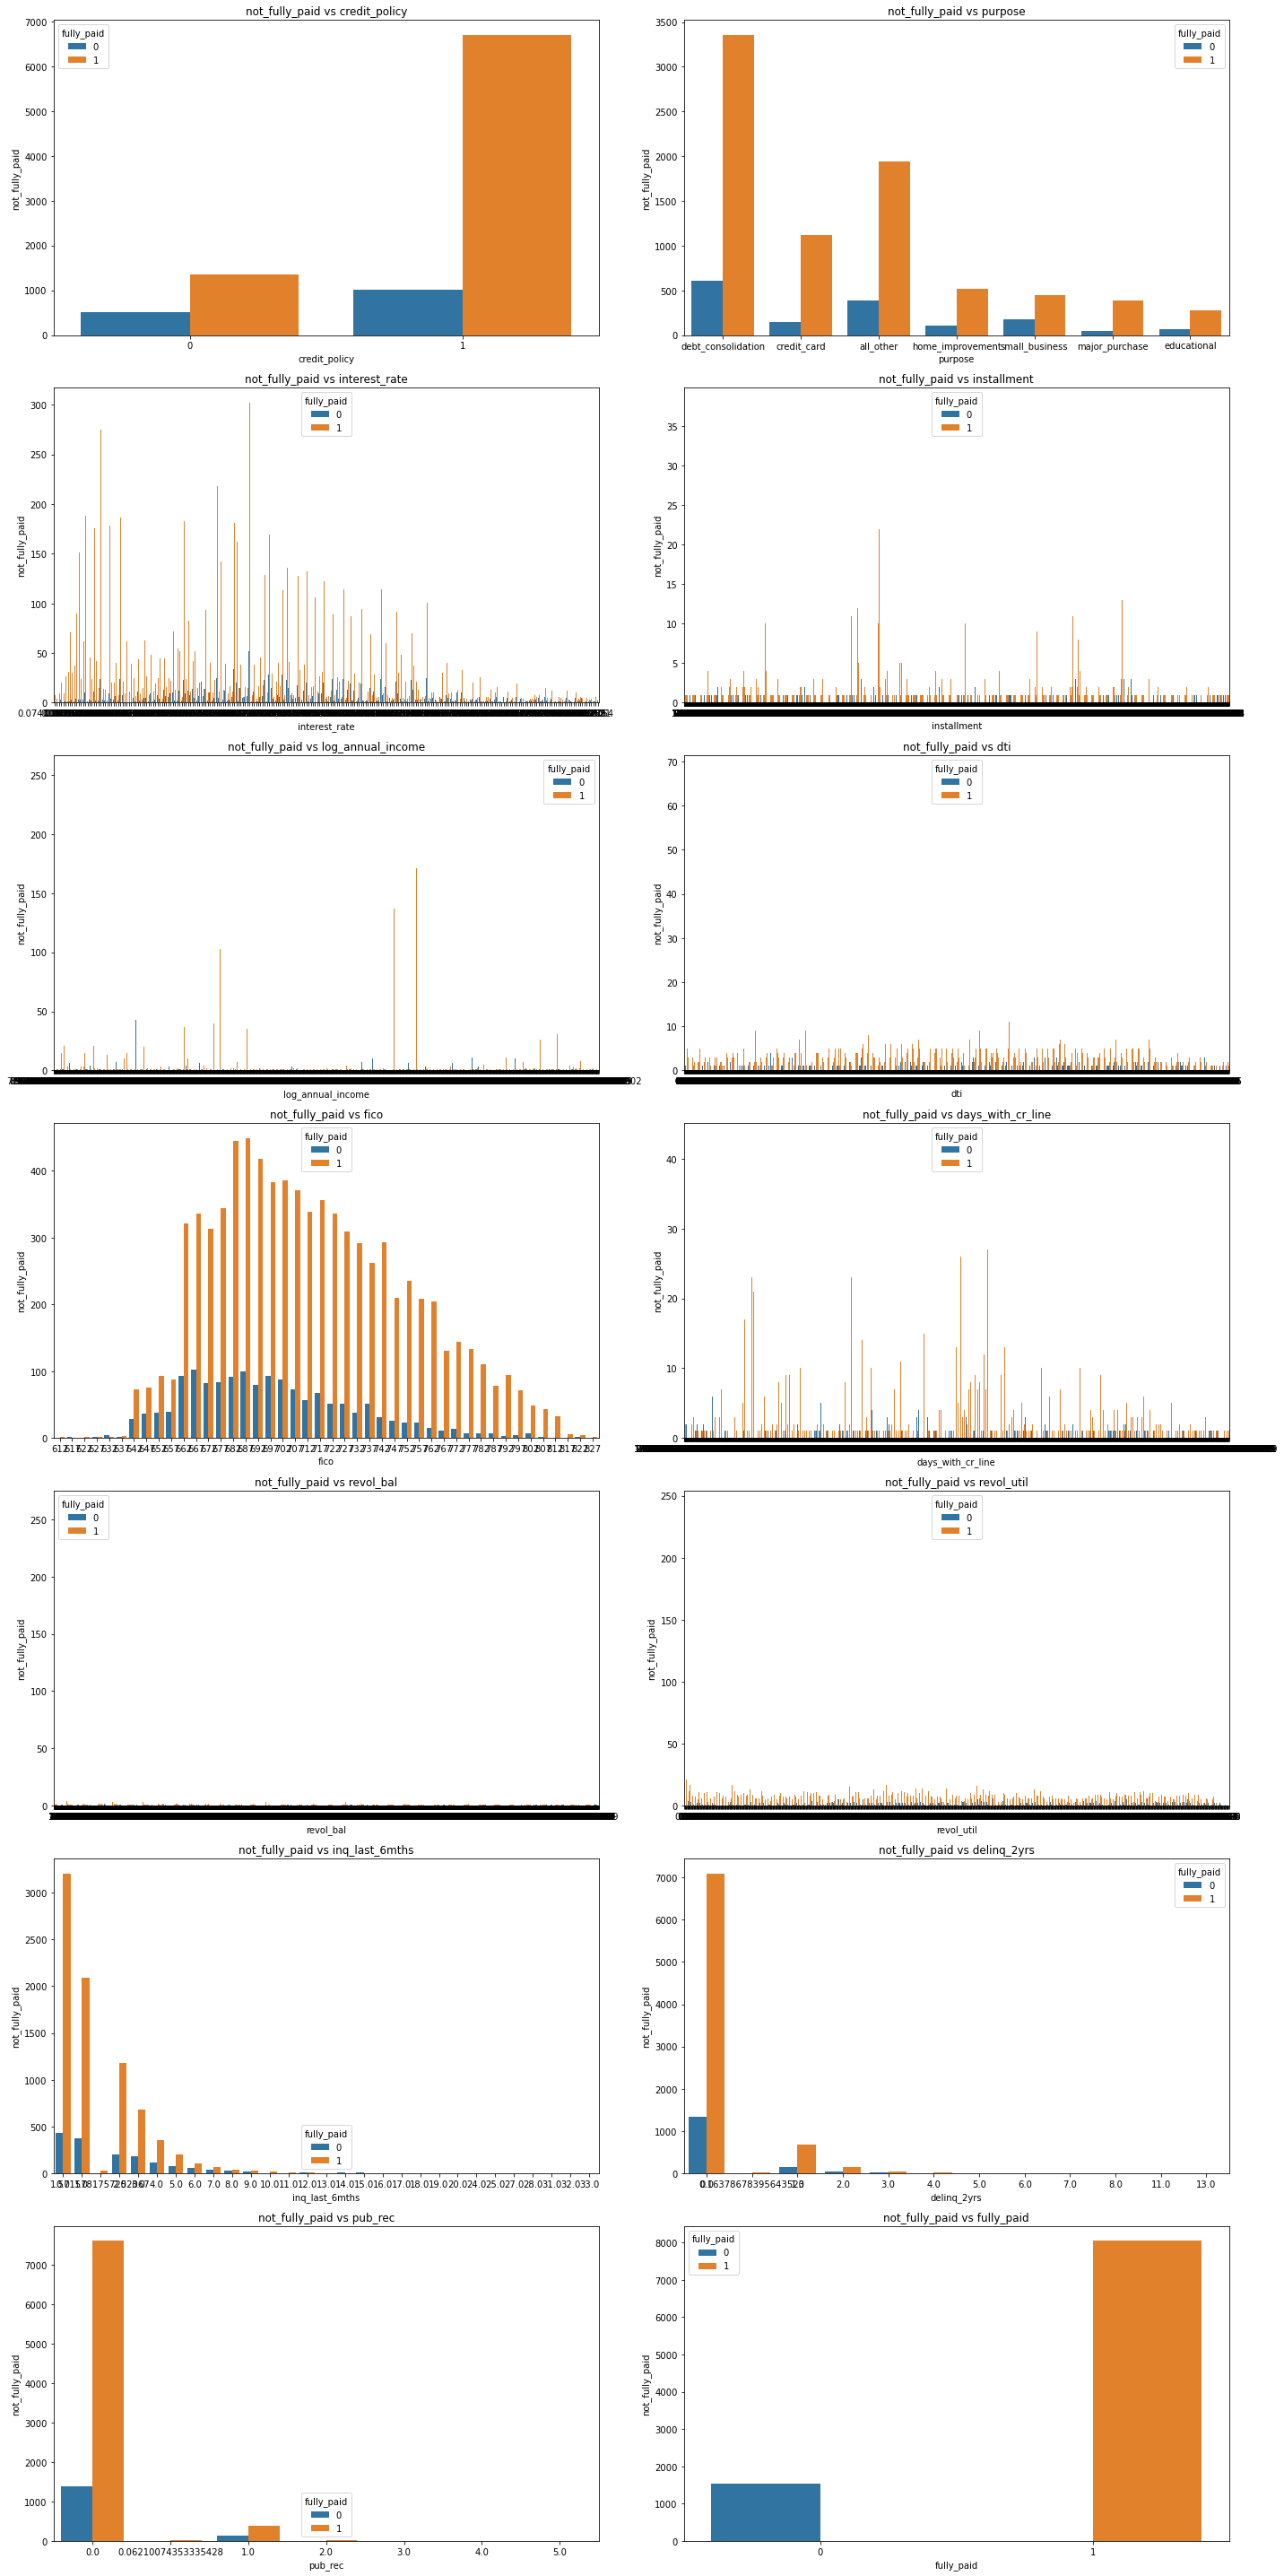

In [25]:
plt.figure(figsize=(20,40), facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=14:
        ax=plt.subplot(7,2,plotnumber)
        sns.countplot(x=data[column].dropna(axis=0), hue=data.fully_paid)
        plt.xlabel(column)
        plt.ylabel('not_fully_paid')
        plt.title(f'not_fully_paid vs {column}')
    plotnumber+=1
plt.tight_layout()

In [12]:
# converting "purpose" column datagorical data into to numerical data

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.purpose=le.fit_transform(data.purpose)
data.purpose.value_counts()

2    3957
0    2331
1    1262
4     629
6     619
5     437
3     343
Name: purpose, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   interest_rate      9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_income  9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   float64
 11  delinq_2yrs        9578 non-null   float64
 12  pub_rec            9578 non-null   float64
 13  fully_paid         9578 non-null   int64  
dtypes: float64(9), int32(1), int64(4)
memory usage: 1010.3 KB


In [29]:
data.head()

credit_policy  purpose  interest_rate  installment  log_annual_income  \
0              1        2         0.1189       829.10          11.350407   
1              1        1         0.1071       228.22          11.082143   
2              1        2         0.1357       366.86          10.373491   
3              1        2         0.1008       162.34          11.350407   
4              1        1         0.1426       102.92          11.299732   

     dti  fico  days_with_cr_line  revol_bal  revol_util  inq_last_6mths  \
0  19.48   737        5639.958333      28854        52.1             0.0   
1  14.29   707        2760.000000      33623        76.7             0.0   
2  11.63   682        4710.000000       3511        25.6             1.0   
3   8.10   712        2699.958333      33667        73.2             1.0   
4  14.97   667        4066.000000       4740        39.5             0.0   

   delinq_2yrs  pub_rec  fully_paid  
0          0.0      0.0           1  
1          0.0      0.0           1  
2          0.0      0.0           1  
3          0.0      0.0           1  
4          1.0      0.0           1

# now all the data is converted into numerical data type

<AxesSubplot:>

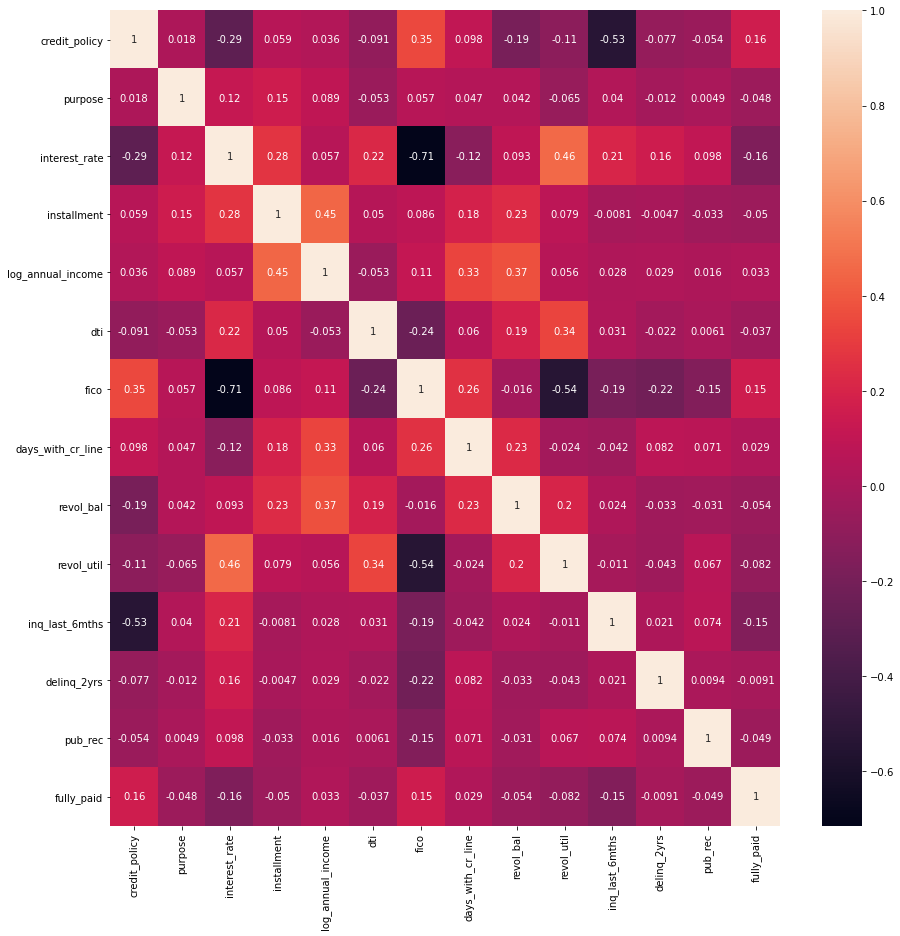

In [14]:
# checking for corelation

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)

In [15]:
# saperating dependent & independent variable

x=data.drop(columns={'fully_paid'}, axis=1)
y=data.fully_paid

In [32]:
data.fully_paid.value_counts()

1    8045
0    1533
Name: fully_paid, dtype: int64

In [16]:
data.fully_paid.value_counts(normalize=True)

1    0.839946
0    0.160054
Name: fully_paid, dtype: float64

In [17]:
# Balancing data

!pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

In [18]:
# Counter

from collections import Counter
print(f"x before smote : {Counter(x)}")
print(f"x after smote : {Counter(x_smote)}")

print(f"y before smote : {Counter(y)}")
print(f"y after smote : {Counter(y_smote)}")

x before smote : Counter({'credit_policy': 1, 'purpose': 1, 'interest_rate': 1, 'installment': 1, 'log_annual_income': 1, 'dti': 1, 'fico': 1, 'days_with_cr_line': 1, 'revol_bal': 1, 'revol_util': 1, 'inq_last_6mths': 1, 'delinq_2yrs': 1, 'pub_rec': 1})
x after smote : Counter({'credit_policy': 1, 'purpose': 1, 'interest_rate': 1, 'installment': 1, 'log_annual_income': 1, 'dti': 1, 'fico': 1, 'days_with_cr_line': 1, 'revol_bal': 1, 'revol_util': 1, 'inq_last_6mths': 1, 'delinq_2yrs': 1, 'pub_rec': 1})
y before smote : Counter({1: 8045, 0: 1533})
y after smote : Counter({1: 8045, 0: 8045})


In [19]:
# train_test_split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=100)
y_test

7648     1
6123     1
10252    0
14663    0
3770     0
        ..
7019     1
6342     1
5494     1
15490    0
5772     1
Name: fully_paid, Length: 4023, dtype: int64

In [20]:
# function to perform training with entropy

from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=30, min_samples_leaf=14)
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [21]:
# y_predict
y_pred= dt.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [22]:
pd.crosstab(y_test, y_pred)

col_0          0     1
fully_paid            
0           1707   345
1            360  1611

In [23]:
# for "0" & '1'
# total 0 = 408  (18%)
# total 1 = 1987 (91%)

# accuracy is not good so better to use 'SMOTE'

In [27]:
x_train.shape

(12067, 13)

In [28]:
y_train.shape

(12067,)

In [29]:
x_test.shape

(4023, 13)

In [30]:
y_test.shape

(4023,)

In [31]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2052
           1       0.82      0.82      0.82      1971

    accuracy                           0.82      4023
   macro avg       0.82      0.82      0.82      4023
weighted avg       0.82      0.82      0.82      4023



In [32]:
# test accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)
accuracy

Accuracy=accuracy*100
Accuracy

82.47576435495898

[Text(386.78920315994657, 1604.4967741935484, 'X[0] <= 0.5\ngini = 0.5\nsamples = 12067\nvalue = [5993, 6074]'),
 Text(91.1901299235835, 1551.890322580645, 'X[10] <= 0.0\ngini = 0.377\nsamples = 4050\nvalue = [3029, 1021]'),
 Text(24.759169980119285, 1499.283870967742, 'X[3] <= 172.736\ngini = 0.49\nsamples = 285\nvalue = [122, 163]'),
 Text(8.098210735586482, 1446.6774193548388, 'X[6] <= 673.0\ngini = 0.312\nsamples = 93\nvalue = [18, 75]'),
 Text(3.5499005964214714, 1394.0709677419354, 'X[1] <= 3.5\ngini = 0.095\nsamples = 40\nvalue = [2, 38]'),
 Text(1.7749502982107357, 1341.4645161290323, 'X[7] <= 4140.469\ngini = 0.051\nsamples = 38\nvalue = [1, 37]'),
 Text(0.8874751491053678, 1288.858064516129, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(2.6624254473161035, 1288.858064516129, 'X[7] <= 4350.448\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(1.7749502982107357, 1236.2516129032258, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(3.5499005964214714, 1236.25161290322

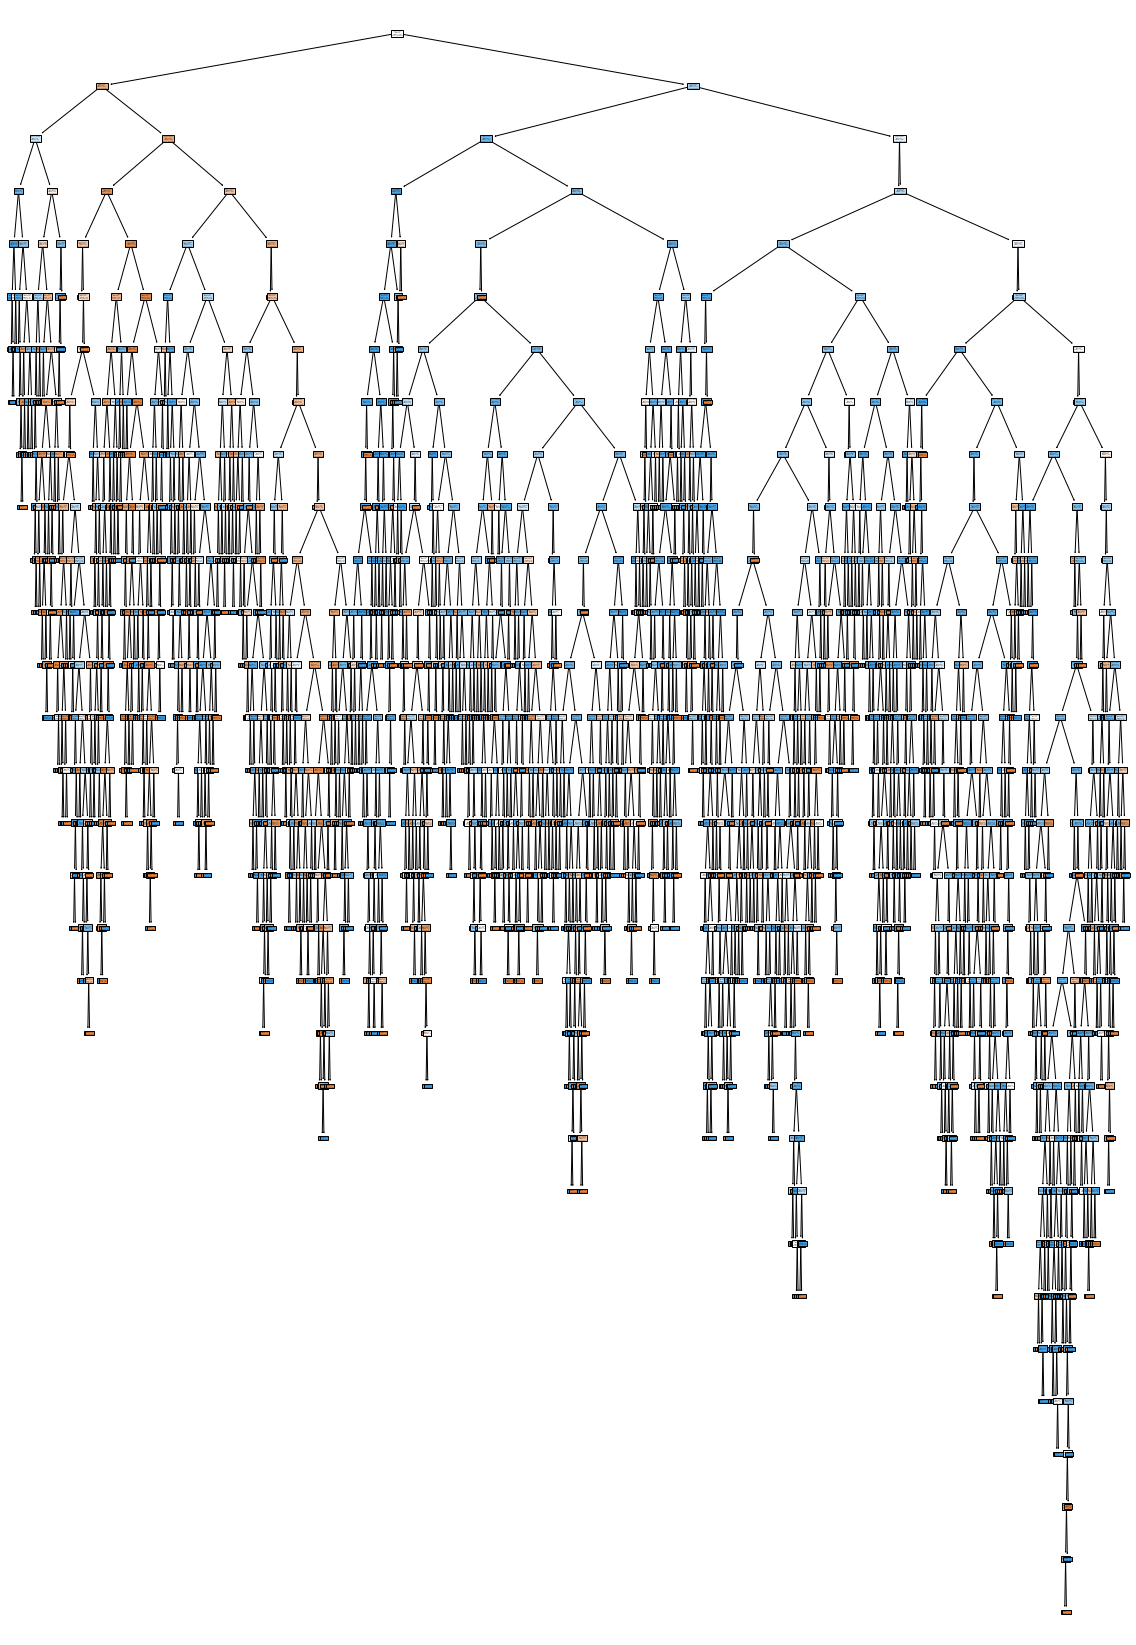

In [56]:
# construct tree

from sklearn import tree
plt.figure(figsize=(20,30))
tree.plot_tree(dt, filled=True)

In [35]:
# from the above in decision tree algarithm the accuracy=82% is low
#  so we use hyper parameter to i crease the model accuracy


from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(random_state=3)


params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}
from sklearn.model_selection import GridSearchCV 
cv = GridSearchCV(dt1, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
cv.fit(x_train, y_train)
cv.cv_results_

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


{'mean_fit_time': array([0.02604024, 0.01562532, 0.03124785, ..., 0.03734422, 0.25018382,
        0.03853679]),
 'std_fit_time': array([7.36451563e-03, 4.49566384e-07, 1.27588298e-02, ...,
        5.45334325e-03, 6.71336167e-03, 3.90830087e-03]),
 'mean_score_time': array([0.01041635, 0.00520905, 0.01041627, ..., 0.01065334, 0.01033711,
        0.01383718]),
 'std_score_time': array([0.00736547, 0.00736671, 0.00736541, ..., 0.00094795, 0.0004641 ,
        0.00543638]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[1, 1, 1, ..., 19, 19, 19],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 1, ..., 19, 19, 19],
              mask=[False

In [43]:
# y1_pred

y1_pred = cv.predict(x_test)
y1_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score
cv_accuracy = accuracy_score(y_test, y1_pred) * 100
cv_accuracy

82.84862043251306

In [45]:
pd.crosstab(y_test,y1_pred)

col_0          0     1
fully_paid            
0           1538   514
1            176  1795

In [47]:
dt2=DecisionTreeClassifier(criterion='gini',max_depth=13,min_samples_leaf=1,min_samples_split=3,splitter='best')
dt2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=13, min_samples_split=3)

In [48]:
y2_pred = cv.predict(x_test)

dt2_accuracy = accuracy_score(y_test, y2_pred)
dt2_accuracy

0.8284862043251305

In [49]:
pd.crosstab(y_test,y2_pred)

col_0          0     1
fully_paid            
0           1538   514
1            176  1795

# RandomForest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier()

In [52]:
y_rf_pred = rf.predict(x_test)

rf_accuracy = accuracy_score(y_test, y_rf_pred) * 100
rf_accuracy

88.19289087745463

In [53]:
# from the above in RabdomForest algarithm the accuracy=88% is low
#  so we use hyper parameter (RandomizedSearchCV) to increase the model accuracy


from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(random_state=42)


n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

from sklearn.model_selection import RandomizedSearchCV
random=RandomizedSearchCV(estimator=rf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                          verbose=2, random_state=42, n_jobs=-1)


random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [56]:
y2_rf_pred = random.predict(x_test)

rf_random_accuracy=accuracy_score(y_test, y2_rf_pred) * 100
rf_random_accuracy

89.73402933134477